Import Dependencies

In [1]:
import cv2 
import numpy as np 
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

Keypoints using MP Holistic

In [2]:
#keypoints using mediapipe
mp_holistic=mp.solutions.holistic #holistic model to get predictions
mp_drawing=mp.solutions.drawing_utils #drawing utilities to draw

In [3]:
def mediapipe_detection(image, model):
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #color conversion
    image.flags.writeable= False #image no longer writeable
    results=model.process(image) #make prediction
    image.flags.writeable= True
    image=cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #color conversion
    return image, results


In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    

In [5]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION
    , mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
    mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))

    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS
      , mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
    mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))

    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS
      , mp_drawing.DrawingSpec(color=(121,22,10), thickness=2, circle_radius=4),
    mp_drawing.DrawingSpec(color=(121,80,256), thickness=2, circle_radius=2))

    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS
      , mp_drawing.DrawingSpec(color=(245,110,66), thickness=2, circle_radius=4),
    mp_drawing.DrawingSpec(color=(245,66,121), thickness=2, circle_radius=2))
    

In [6]:
#video capture
cap=cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened:
        ret, frame=cap.read() #read feed

        #make detection 
        image, results=mediapipe_detection(frame,holistic)
        print(results)
        
        #draw landmarks
        draw_styled_landmarks(image, results)

        cv2.imshow('OpenCV Feed', image) #show to screen
        if cv2.waitKey(10) & 0xFF == ord('q'): #break gracefully if q pressed
            break

    cap.release()
    cv2.destroyAllWindows()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
#got keypoints from videostream
len(results.face_landmarks.landmark)

468

In [8]:
len(results.right_hand_landmarks.landmark)

21

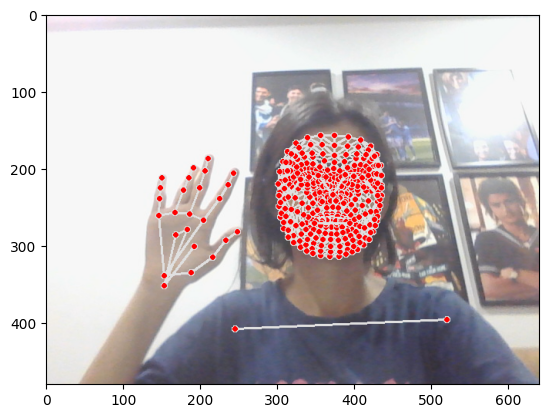

In [9]:
#applying landmarks to last frame 
draw_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

Extract Keypoint Values

In [10]:
results.pose_landmarks.landmark[0].visibility

0.9999357461929321

In [11]:
#converting into numpy array
pose=[]
for res in results.pose_landmarks.landmark:
    test= np.array([res.x, res.y,res.z,res.visibility])
    pose.append(test)

In [12]:
pose

[array([ 0.58254939,  0.48921722, -1.13136172,  0.99993575]),
 array([ 0.60751754,  0.43484259, -1.05025232,  0.99986142]),
 array([ 0.62479091,  0.43758434, -1.05045903,  0.9997977 ]),
 array([ 0.64092553,  0.441789  , -1.05025232,  0.99978679]),
 array([ 0.55293941,  0.43607295, -1.03634644,  0.99989438]),
 array([ 0.53409612,  0.44035789, -1.03643227,  0.99989694]),
 array([ 0.51680547,  0.44585997, -1.03694487,  0.99992788]),
 array([ 0.67233819,  0.49043015, -0.58215535,  0.99976242]),
 array([ 0.491721  ,  0.49444011, -0.48130241,  0.99992812]),
 array([ 0.61628348,  0.56519771, -0.96501672,  0.99991369]),
 array([ 0.54477036,  0.56593215, -0.94261599,  0.99994326]),
 array([ 0.81348181,  0.82641339, -0.31562251,  0.9951573 ]),
 array([ 0.38310879,  0.85020715, -0.22214933,  0.9987908 ]),
 array([ 0.97322118,  1.06679833, -0.45859432,  0.57125431]),
 array([ 0.11323413,  1.10458016, -0.84393519,  0.97494584]),
 array([ 1.05732942,  1.49274051, -0.86594552,  0.62546736]),
 array([

In [13]:
len(pose)

33

In [14]:
#do same code in single line 
#flatten to save in one set of array instead of 4 sets for same value (x,y,z, visi)
pose=np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)


In [15]:
len(pose) #33*4

132

In [16]:
#if statement to handle empty
rh=np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [17]:
rh

array([ 2.39810333e-01,  7.06784725e-01,  4.08123242e-07,  2.93942183e-01,
        6.97935820e-01, -2.25832891e-02,  3.37953359e-01,  6.56803489e-01,
       -2.61891279e-02,  3.64686310e-01,  6.11567438e-01, -2.73961909e-02,
        3.87516201e-01,  5.88160872e-01, -2.71810275e-02,  3.19862634e-01,
        5.56793511e-01, -5.40119410e-03,  3.51786762e-01,  4.98484612e-01,
       -1.10013830e-02,  3.69025767e-01,  4.61002231e-01, -1.78950503e-02,
        3.80595326e-01,  4.29491818e-01, -2.27508824e-02,  2.90920496e-01,
        5.39781451e-01, -5.91701188e-04,  3.12126309e-01,  4.69985098e-01,
       -3.13266926e-03,  3.22843552e-01,  4.24206138e-01, -8.39734357e-03,
        3.29584926e-01,  3.90510380e-01, -1.22727435e-02,  2.61745483e-01,
        5.37157357e-01,  7.92448642e-04,  2.78802693e-01,  4.76690680e-01,
       -2.98480433e-03,  2.90093273e-01,  4.41942453e-01, -7.53699942e-03,
        2.98728019e-01,  4.15981233e-01, -1.06520783e-02,  2.28992581e-01,
        5.45492411e-01, -

In [18]:
rh.shape

(63,)

In [19]:
lh=np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [20]:
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
face=np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

In [22]:
face

array([ 0.58081806,  0.54055458, -0.03537194, ...,  0.65326244,
        0.43605858,  0.02738563])

In [23]:
def extract_keypoints(results):
    pose=np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face=np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh=np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh=np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

    return np.concatenate([pose, face, lh, rh])


In [24]:
extract_keypoints(results).shape

(1662,)

In [25]:
468*3+33*4+21*3+21*3

1662

In [26]:
result_test=extract_keypoints(results)

In [27]:
result_test

array([ 0.58254939,  0.48921722, -1.13136172, ...,  0.23499978,
        0.44242519, -0.00724467])

In [28]:
np.save('0', result_test)

In [29]:
np.load('0.npy')

array([ 0.58254939,  0.48921722, -1.13136172, ...,  0.23499978,
        0.44242519, -0.00724467])

Set up Folders for Collection

In [30]:
#path for exported data, numpy arrays
DATA_PATH=os.path.join('MP_Data')

#Actions that we try to detect
actions=np.array(['hello','thanks','iloveyou'])

no_sequences=30 #thirty videos worth of data
 
sequence_length=30 #videos are going to be 30 frames in length

In [31]:
#hello (0...29)
#thanks
#iloveyou

In [32]:
#creates folders for actions
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

Collect Keypoint Values for Training and Testing:

In [33]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [34]:
cap.release()
cv2.destroyAllWindows()

Preprocess Data and Create Labels and Features

In [35]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [36]:
label_map = {label: num for num, label in enumerate(actions)}


In [37]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [46]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [47]:
np.array(sequences).shape

(90, 30, 1662)

In [48]:
np.array(labels).shape

(90,)

In [49]:
X = np.array(sequences)
X.shape

(90, 30, 1662)

In [50]:
y = to_categorical(labels).astype(int)
y.shape

(90, 3)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
y_test.shape

(5, 3)

Build and Train LSTM Neural Network

In [57]:
#used mediapipe and lstm as easier to train as lesser neurons, simpler network also, less data reqd for higher accuracy

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import TensorBoard #helps monitor, can see y link to check 

In [54]:
log_dir=os.path.join('Logs')
tb_callback=TensorBoard(log_dir=log_dir)

In [81]:
model=Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [56]:
res=[.7, 0.2,0.1]

In [58]:
actions[np.argmax(res)]

'hello'

In [82]:
model.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [62]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - categorical_accuracy: 0.3346 - loss: 1.2374
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - categorical_accuracy: 0.2702 - loss: 1.2271
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - categorical_accuracy: 0.2858 - loss: 1.2411
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 0.3796 - loss: 1.1643
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - categorical_accuracy: 0.4286 - loss: 1.3452
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - categorical_accuracy: 0.3229 - loss: 1.1009
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - categorical_accuracy: 0.4286 - loss: 1.0830
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 0.4540 - loss: 1.0943
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - categorical_accuracy: 0.4090 - loss: 1.0965
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - categorical_accuracy: 0.4344 - loss: 1.0482
Epoch 11/2000
3/3 ━━━━━━━━━

KeyboardInterrupt: 

In [63]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

Make Predictions

In [64]:
res=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


In [76]:
actions[np.argmax(res[0])] #select action corresponding to max prob

'hello'

In [77]:
actions[np.argmax(y_test[0])]

'hello'

Save Weights

In [78]:
model.save('action.h5')

In [79]:
del model

In [83]:
model.load_weights('action.h5')

Evaluation 

In [84]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [97]:
yhat=model.predict(X_train)
yhat=np.array(yhat)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 


In [98]:
ytrue=np.argmax(y_train, axis=1).tolist()
yhat=np.argmax(yhat, axis=1).tolist()

In [99]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[59,  0],
        [ 3, 23]],

       [[54,  1],
        [ 3, 27]],

       [[50,  6],
        [ 1, 28]]], dtype=int64)

In [100]:
accuracy_score(ytrue,yhat)

0.9176470588235294

Test in Real Time

In [114]:
#render probabilities
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

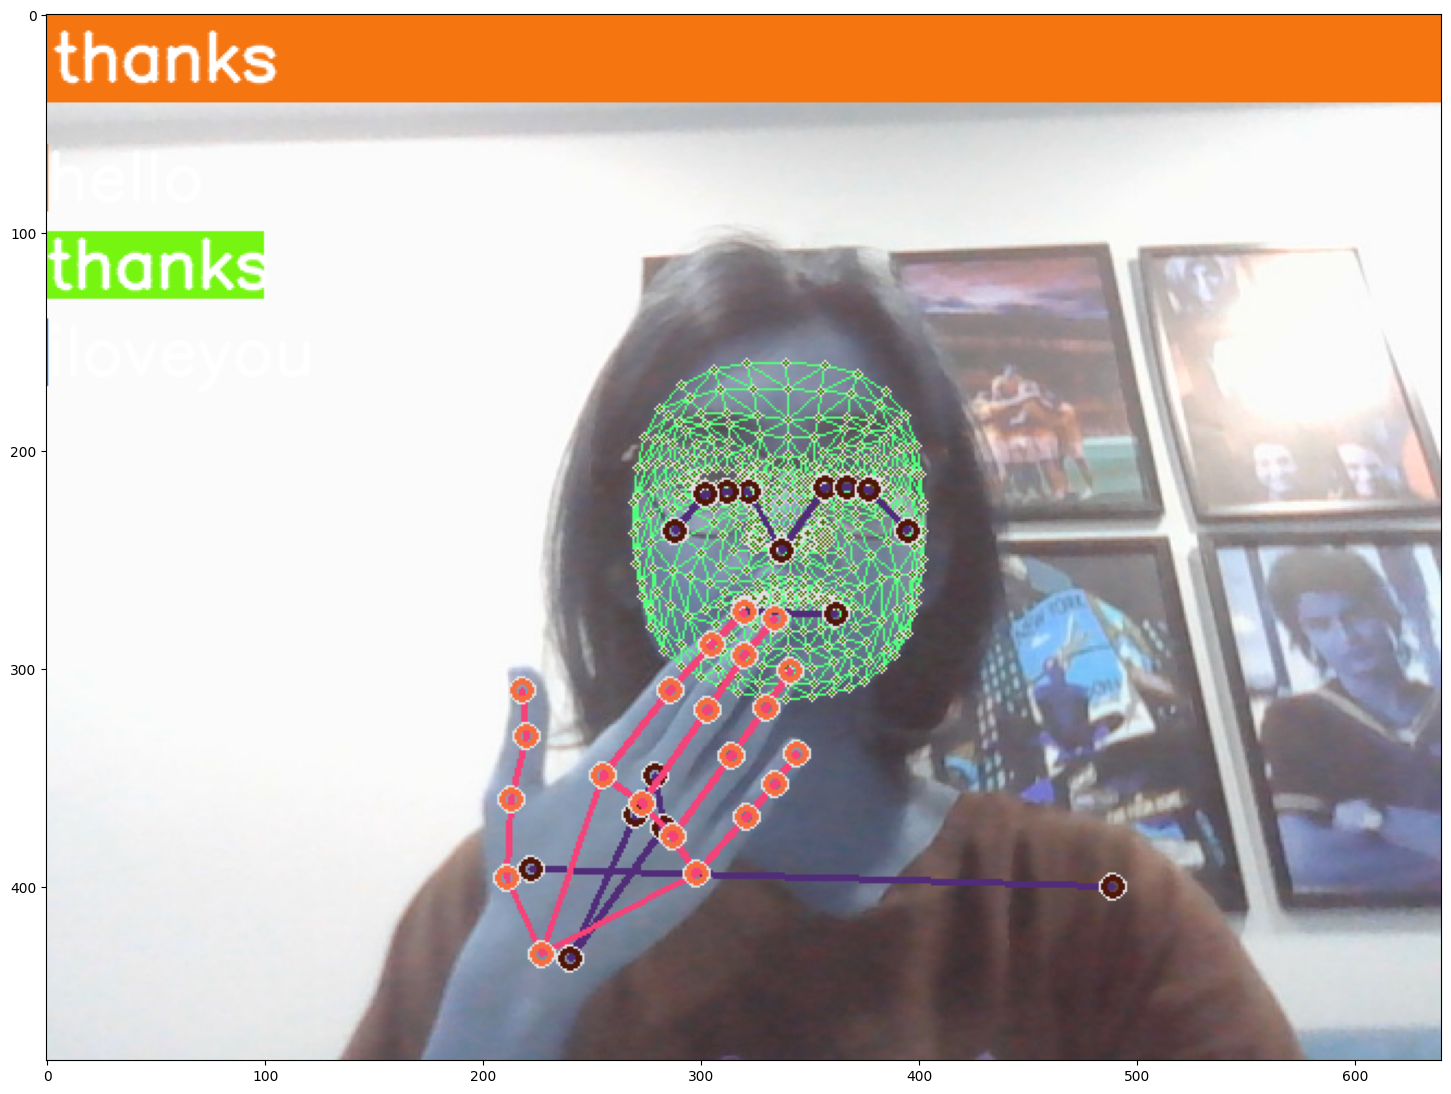

In [117]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [120]:
# 1. New detection variables
sequence = [] #store 30 frames as one
sentence = []
predictions=[] #used to imporve performance 
threshold = 0.7

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0] #below 
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): #checks if last 10 frames stay that action, then only changes
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]: #we only change if next action diff from cur, so check that
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)]) #if empty sentence, put sentence

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            #viz probabilities
            image=prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [101]:
#expand_dims
X_test[0].shape

(30, 1662)

In [104]:
np.expand_dims(X_test[0], axis=0).shape

(1, 30, 1662)

In [105]:
#we need 1 in start, so expand dim (num_sequences, 30, 1662)
model.predict(np.expand_dims(X_test[0], axis=0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[9.9260449e-01, 5.1613875e-07, 7.3949979e-03]], dtype=float32)